In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Operator
from qiskit.tools.monitor import job_monitor

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex
import math

# An encryption problem

A pretty well-known problem in computer science is the problem of encryptying messages, i.e, given a message $m$, a sender $A$ and a receiver $B$, we want to send the message $m$ encrypted, so that only $B$ will be able to decrypt the information sended from $A$. We can ilustrate this situation by a simple example: Lets suppose Alice wants to send her secret chocolate cake recipe to Bob, but the message will be stolen if the used information channel is unsafe, and her archenemy, Eve, will finally find out Alice's delicious secret chocolate cake recipe. And we know that both Alice and Bob have lots of padlocks, but they don't share any of its keys. Hence from that we got our main problem.

$$
\text{How Alice could send the secret recipe to Bob, without being eavesdropped on?}
$$
# The Caesar's Cipher

Throughout history this problem achieved huge relevance, once to be able to send secret messages to someone is a kind of communication superpower. A simple example of information cryptography enconding is The Caesar's Cipher, using it we can encode a message by shifting its characters by a constant private key $k$ in the roman alphabet
$$
    \Sigma = \text{ABCDEFGHIJKLMNOPQRSTUVWXYZ}
$$

Then, given a message $x =$ CHOCOLATE CAKE, and a encryption function with a factor private key $\text{k} = 4$

$$
    E_k(x) = (x + \text{k}) \text{ mod } 26
$$
We get an encrypted message $y =$ GLSGSPEXI GEOI.

In [2]:
def encryptCipher(x, k):
    encryptedStr = ""
    
    for ch in x:
        newCh = ch
        if (ord(ch) >= ord("A") and ord(ch) <= ord("Z")):
            newCh = chr((ord(ch) - ord("A") + k)%26 + ord("A"))   
            
        encryptedStr = encryptedStr + newCh     

    return encryptedStr

And to decrypt the message, we need just to have or find out the factor $\text{k}$ and to apply a decryption function

$$
    D_k(x) = (x - \text{k}) \text{ mod } 26
$$

In [3]:
def decryptCipher(x, k):
    decryptedStr = ""
    
    for ch in x:
        newCh = ch
        if (ord(ch) >= ord("A") and ord(ch) <= ord("Z")):
            newCh = chr((ord(ch) - ord("A") - k + 26)%26 + ord("A"))
        decryptedStr = decryptedStr + newCh
    
    return decryptedStr

In [4]:
x = "CHOCOLATE CAKE"
k = 4

y = encryptCipher(x, k)
d = decryptCipher(y, k)

print(f'Initial message: {x}\nEncrypted Message: {y}\n')

if (x == d):
    print(f"Message successfully decrypted: {d}")
else:
    print("Decryption Failed")

Initial message: CHOCOLATE CAKE
Encrypted Message: GLSGSPEXI GEOI

Message successfully decrypted: CHOCOLATE CAKE


It's easy to see why this is not a safe encryption method, since we can easily bruteforce the initial message by testing all 26 possible private $\text{k}$ keys. Therefore, Alice would most likely like want to use a more safe encryption algorithm to avoid any eavesdropping from her archenemy. 

# The RSA Algorithm

An idea that could be better for Alice's and Bob's problem is developed based on public-key distribution cryptography. Alice will receive a public key from Bob, encrypt her message using it, then send it to Bob, that will decrypt the message sended by Alice with his private key. 

This looks a lot like with the RSA encryption protocol, heavily used to securely transmit messages over the internet. Developed by Ron Rivest, Adi Shamir e Leonard Adleman, the RSA algorithm is based on the public-key distribution cryptography model, where we have an encryption key, which is public, and a decryption key, which is private.

In this cryptography protocol our user will get the public-key by the multiplication of two large prime numbers $p$ and $q$, and the private-key will also be generated by other particular use of these prime numbers. Our user can easily distribute the public key $N = pq$, while mantaining securely the individual values of $p$ and $q$, since to factor a number into two prime factors is a pretty difficult problem for classical computers.

The key generator implementation can be easily described by the following steps  

$$
\begin{align*}
1.&\text{ Randomly pick two large prime numbers } p \text{ and } q \text{, and take their product } N = pq.\\
2.&\text{ Compute Euler's Totient function } \phi(N) = (p - 1)(q - 1) \text{, and pick a number } e \text{ so that, } 1 \leq e \leq \phi(N) \text{ and gcd}(e, \phi(N)) = 1.\\
3.&\text{ Calculate the modular inverse } d \text{ of } e \text{ modulo } \phi(N) \text{ i.e, } de \equiv 1 \text{ mod }\phi(N) \text{. In other words } d \text{ is the multiplicative inverse of } e \text{ in } \phi(N).\\
4.&\text{ Distribute the public-key } (N, e) \text{ and keep the secret private-key } (p, q, d).\\
\end{align*}
$$

Hence, to encrypt a message $m$, where $m < n$, to transmit a ciphertext $c$, we just take by fast exponentiation

$$
    c = m^e\text{ mod } n
$$

And likewise, the message receiver computes $m = c^d \text{ mod } n$, retrieving the original $m$ message.

In [5]:
def fastExp(a, b, n):
    ans = 1
    #computes a^b in O(log b)
    while b > 0:
        if (b & 1):
            ans = (ans * a)%n
        a = (a*a)%n
        b = b >> 1
        
    return ans

In [6]:
def encryptRSA(m, n, e):
    c = fastExp(m, e, n)
    return c

In [7]:
def decryptRSA(c, d, n):
    m =  fastExp(c, d, n)
    return m

As an example, lets consider the first word of our message $x =$ "CAKE", and arbitrary prime numbers $p, q$ and $e$.

In [8]:
#set 'p', 'q', e and 'n'
#CAKE = 67 65 75 69 10 
m = 6765756910
p = 42643801; q = 59604644783353249; e = 2097593
n = p*q

#computes 'phi(n)'
phi_n = (p-1)*(q-1)

#computes multiplicative inverse 'd' of 'e mod phi(n)' (python is strange)
d = pow(e, -1, phi_n)

In [9]:
c = encryptRSA(m, n, e)
y = decryptRSA(c, d, n)

In [10]:
print(f'Initial message: {m}\nEncrypted ciphertext message: {c}\n')

if m == y:
    print(f"Message successfully decrypted: {y}")
else:
     print("Decryption Failed")

Initial message: 6765756910
Encrypted ciphertext message: 587708175265402063982608

Message successfully decrypted: 6765756910


Now that we understood how the RSA protocol works, Alice and Bob are wondering if this might be a good choice for Alice's recipe encryption. And the answer (until now) is YES. As most simple as it might seen, the problem of factoring a number into two primes $p$, $q$ or finding the $d$ factor for a given $c$ ciphertext, i.e, breaking the encryption by finding out the private-key, is a pretty difficult problem for computers to solve. 

This fact comes from the notion that in practice the prime numbers used to encode messages like this are of the order of $10^100$. Therefore algorithms of complexity $O\big(\sqrt{N}\big)$ such as Euler's Totient function algorithm, would take an exponential time to run.

Since, let $N$ be a positive integer and $k = \log_2 N$. A complexity of $O\big(\sqrt{N}\big)$ will be equivalent to $O\big(\sqrt{2^k}\big)$, which is an exponential running time algorithm in terms of the input length for pratical purposes.

But what would happen if we had a Quantum Computer? Is Alice's recipe still safe? *Yes*? Are you Shor about that?

# Shor's Algorithm

Invented by the MIT mathematician Peter Shor in 1994, Shor's algorithm is polinomyal-time quantum computer algorithm that solves the problem of integer factorization. In other words, the problem lies in the idea of: Given a integer $N$, such that $N = pq$, where $p$ and $q$ are large prime numbers, our goal is to find these factors efficiently. 

Classically as we have already discussed this problem would take an exponential amount of time to run in terms of the input lenght. While the quantum solution that we're going to discuss has a time complexity of the order of $O(N^2\log_2 N^3)$, where $N$ is the number of qubits, which can be even faster with proper optimizations. Therefore, we have an exponential speed-up when compared with classical solutions with the most clever known sub-exponential running time complexity of $O(e^{1.9(N^{1/3})(\log N)^{2/3}})$.

## Modular Arithmetic and Periodic Functions

Let $N$ be the integer, such that $N = pq$, and $f : \mathbb{Z} \rightarrow \mathbb{Z}_N$ be a modular periodic function defined as

$$
    f(x) = a^{x} \text{ mod } N
$$

Then, we aim to find the periodicity of this function defined by the smallest positive integer $r$ so that $a^r \equiv 1 \text{ mod } N$.

We can ilustrate our problem by the following example with $N = 15$ and $a = 13$.

$$
\begin{align*}
    x &= 0 \quad 1 \quad \text{          }\text{ }2 \quad 3 \quad 4 \text{ }\text{ }\quad 5 \text{ }\quad 6 \quad 7 \quad 8 \\
    x &\equiv \underbrace{1 \quad 13 \quad 4 \quad 7 \quad 1}_\text{Period $r = 4$} \quad 13 \quad 4 \quad 7 \quad 1 \quad (\text{mod } 15) \\
\end{align*}
$$

Which give us a period of $r = 4$. And we can see it graphically by the following graph

Text(4, 1, '')

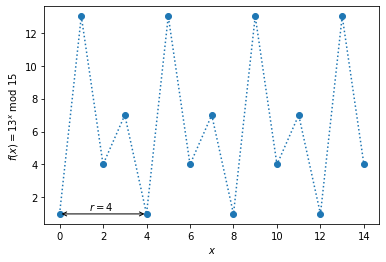

In [49]:
N = 15; a = 13

x = [i for i in range(N)]
y = list(map(lambda n: fastExp(a, n, N), x))

r = 4
             
plt.plot(x, y, linestyle='dotted', marker='o')
plt.xlabel("$x$")
plt.ylabel("$f(x) = 13^x$ mod $15$")
plt.annotate(text='$r=4$', xy=(r/3, 1.2))
plt.annotate(text='', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))

## The Protocol

Finally, with these concepts in hand we are able to see,  or almost, how the algorithm protocol works, with classical and quantum sub-routines.

$$
\begin{align*}
1.&\text{ Randomly pick a number $a$, so that, $1 < a < N$.}\\
2.&\text{ Check if $a$ is a non-trivial factor of $N$, i.e, $\gcd(a, N) \neq 1$. If it is, then we got our answer and are good to go.}\\
3.&\text{ Otherwise, here is where the quantum magic happens, use the period finding function, $U_f$, (that we still don't know) to find $r$.}\\
4.&\text{ If $r$ is even, let $x = a^{\frac{r}{2}}$ mod $N$.}\\
5.&\text{ If $x+1 \not\equiv 0$ mod $N$, then both $\{p, q\}$ are contained in $\big\{\gcd(x+1, N)$, $\gcd(x-1, N)\big\}$, and are non-trivial factors of $N$.}\\
5.&\text{ Otherwise, go back to step 1 and find another $a$.}
\end{align*}
$$

## References 

__[RSA Encryption | Brilliant](https://brilliant.org/wiki/rsa-encryption/)__\
__[RSA (sistema criptográfico)](https://pt.wikipedia.org/wiki/RSA_(sistema_criptogr%C3%A1fico))__